### Частина перша: Знайомство з Pandas.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- **Прочитайте дані за допомогою методу read_html з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)"**

In [2]:
url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C'
birth_data = pd.read_html(url, thousands='.', decimal=',', match='Коефіцієнт народжуваності в регіонах України')[0]

In [3]:
birth_data.replace('—', np.nan, inplace=True)
birth_data[['1950', '1960', '1970', '1990', '2000', '2012', '2014', '2019']]\
    = birth_data[['1950', '1960', '1970', '1990', '2000', '2012', '2014', '2019']].apply(pd.to_numeric)
birth_data

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


- **Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році**

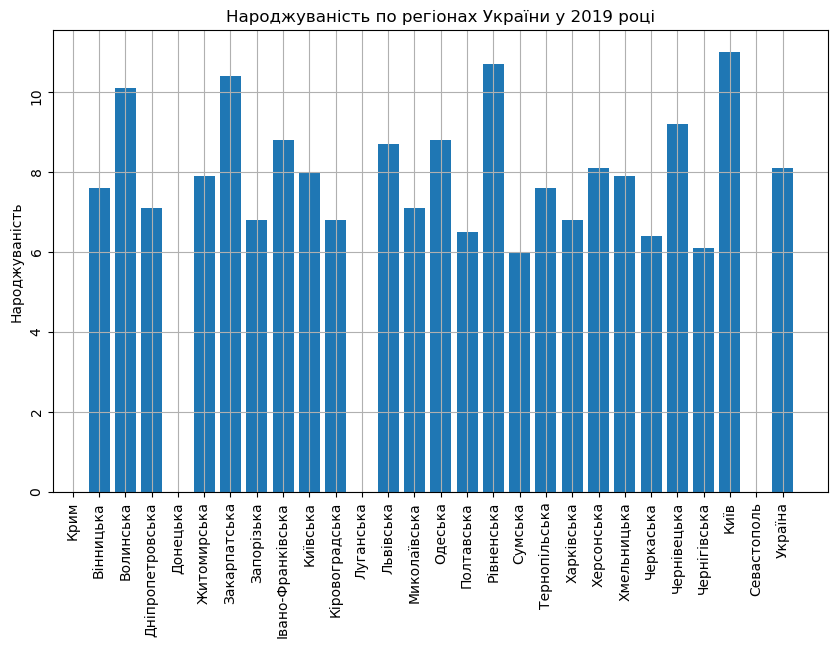

In [4]:
plt.figure(figsize=(10,6))
plt.grid()
plt.bar(birth_data['Регіон'], birth_data['2019'])
plt.tick_params(labelrotation = 90)
plt.title('Народжуваність по регіонах України у 2019 році')
plt.ylabel('Народжуваність')
plt.show()

- **Графік народжуваності в Україні по роках**

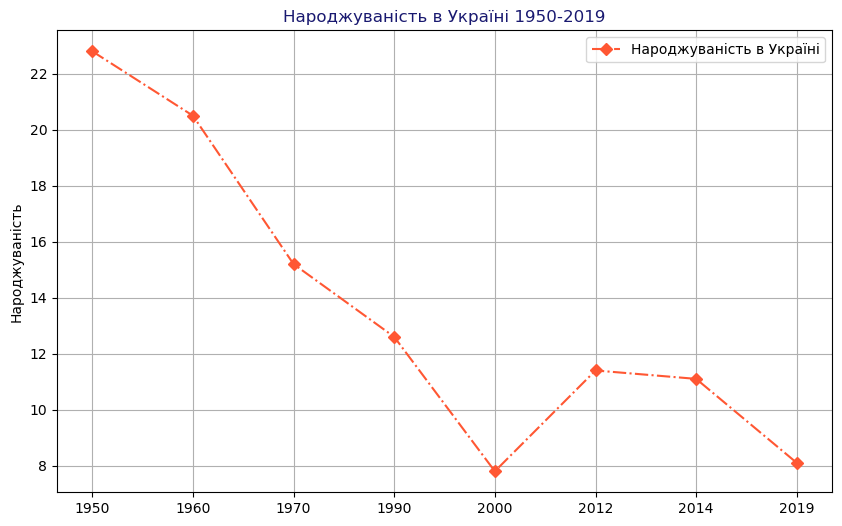

In [5]:
plt.figure(figsize=(10,6))
plt.plot(birth_data.columns[1:], birth_data.iloc[-1, 1:], label='Народжуваність в Україні', linestyle='-.', color="#FF5733",\
        marker='D')
plt.ylabel('Народжуваність')
plt.title('Народжуваність в Україні 1950-2019', color="midnightblue")
plt.legend()
plt.grid()
plt.show()

- **Графік народжуваності в Західній та Північній Україні в період 1950-2019 років**

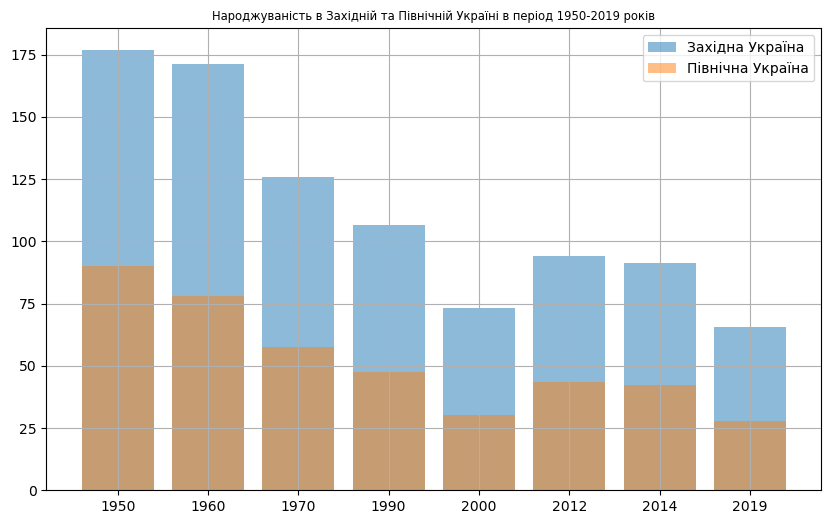

In [6]:
region_data = birth_data.set_index('Регіон')
west_data = region_data.loc[['Львівська', 'Тернопільська', 'Івано-Франківська', 'Рівненська', 'Волинська', 'Закарпатська',\
                            'Чернівецька']].sum()
north_data = region_data.loc[['Житомирська', 'Київська', 'Чернігівська', 'Сумська']].sum()
plt.figure(figsize=(10,6))
plt.bar(west_data.index, west_data.values, label='Західна Україна', alpha=0.5)
plt.bar(north_data.index, north_data.values, label='Північна Україна', alpha=0.5)
plt.title('Народжуваність в Західній та Північній Україні в період 1950-2019 років', fontsize='small')
plt.legend()
plt.grid()
plt.show()

- **Розподіл народжуваності за регіонами в 2000 році**

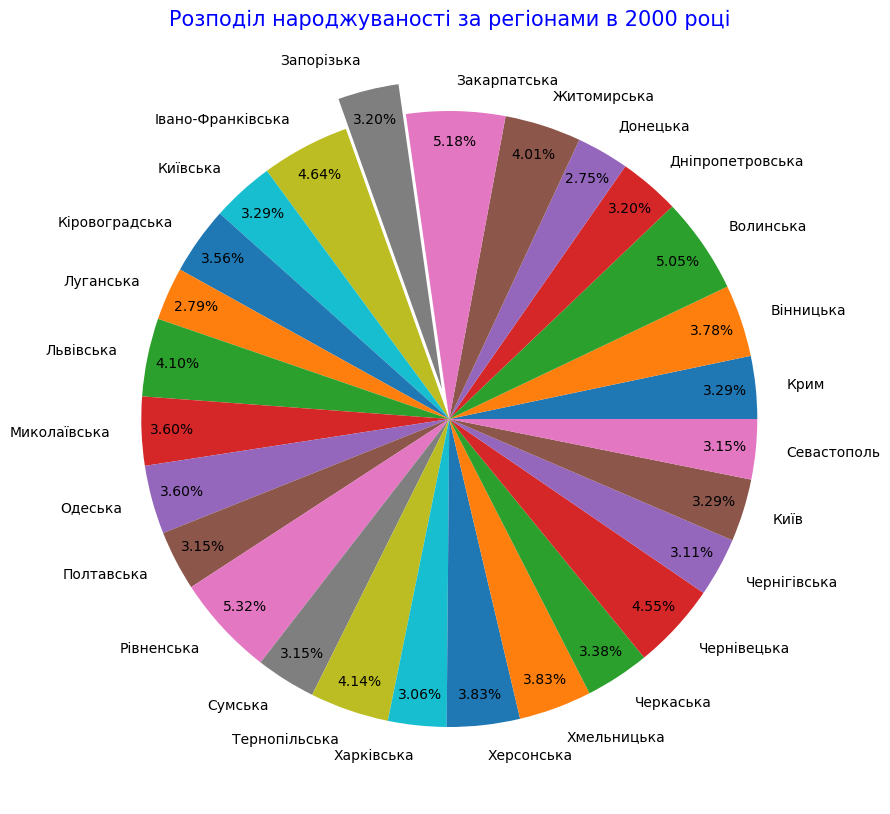

In [7]:
plt.figure(figsize=(10, 10))
plt.title('Розподіл народжуваності за регіонами в 2000 році', fontsize=15, color='b')
explode = [0.1 if i == 'Запорізька' else 0 for i in birth_data.iloc[:-1, 0]]
plt.pie(birth_data.iloc[:-1, -4],
        labels=birth_data.iloc[:-1, 0],
        pctdistance = 0.9,
        explode = explode,
        radius=1.0,
        autopct="%.2f%%")
plt.show()